In [1]:
import gpytorch

from bo_functions import best_error_advanced
from bo_functions import calc_ei_advanced
from bo_functions import LHS_Design
from bo_functions import create_y_data
from bo_functions import test_train_split
from bo_functions import ExactGPModel
from bo_functions import train_GP_model
from bo_functions import calc_GP_outputs
from bo_functions import calc_y_expected
from bo_functions import improvement_integral
from bo_functions import improvement_int_terms

from bo_plotters import plotter_adv
from bo_plotters import y_plotter_adv
from bo_plotters import stdev_plotter_adv
from bo_plotters import ei_plotter_adv
from bo_plotters import improvement_integral_plot
from bo_plotters import improvement_int_terms_plot

In [2]:
#Set noise parameters and load csv file to generate training data
noise_std = 0.1**2
all_p = LHS_Design("LHS_Toy_3_Input.csv")
all_y = create_y_data(all_p, noise_std)

#Separate training and testing data, uses default of an 80%/20% split
train_test_data = test_train_split(all_p,all_y)

train_p = train_test_data[0] #1x19
train_y = train_test_data[1] #1x19
test_p = train_test_data[2] #1x19
test_y = train_test_data[3] #1x19

In [3]:
# initialize likelihood and model
##Assumes a homoskedastic noise model p(y | f) = f + noise
likelihood = gpytorch.likelihoods.GaussianLikelihood()

# We will use the simplest form of GP model, exact inference
#Defines our model in terms of the class parameters in bo_functions
model = ExactGPModel(train_p, train_y, likelihood)

In [4]:
#Set number of training iterations and train GP
iterations = 500
train_GP_model(model,likelihood, train_p, train_y, iterations)

In [5]:
# Get into evaluation (predictive posterior) mode
#Puts model in evaluation mode
model.eval()
#Puts likelihood in evaluation mode
likelihood.eval();

In [6]:
#Calculates GP outputs for mean, variance, standard devaition, and y output
GP_Outputs = calc_GP_outputs(model,likelihood,test_p)

model_mean = GP_Outputs[0] #1x6
model_variance= GP_Outputs[1] #1x6
model_stdev = GP_Outputs[2] #1x6
model_y = GP_Outputs[3] #1x6

#Calculates expected y
y_exp = calc_y_expected(test_p, noise_std) #1x6

print("Model Mean \n", model_mean)
print("Model Variance \n", model_variance)
print("Model Standard Deviation \n", model_stdev)
print("Model y \n", model_y)
print("Y Value Expected \n", y_exp)

Model Mean 
 tensor([ 2.9863, -6.2400, -5.0326, -7.5661, -1.9632, -0.5227],
       dtype=torch.float64)
Model Variance 
 tensor([7.0452, 6.6658, 6.6159, 7.9151, 5.9328, 5.7719], dtype=torch.float64)
Model Standard Deviation 
 tensor([2.6543, 2.5818, 2.5721, 2.8134, 2.4357, 2.4025], dtype=torch.float64)
Model y 
 tensor([ 2.9863, -6.2400, -5.0326, -7.5661, -1.9632, -0.5227],
       dtype=torch.float64)
Y Value Expected 
 [ 9.69888253e+00 -6.46993945e+00 -3.28096161e+00 -1.18678429e+01
 -2.42097316e-03  1.08475307e+00]


In [7]:
#Calculates best_error and expected improvement
best_error = best_error_advanced(model_y, y_exp)[0] #Scaler
best_x = best_error_advanced(model_y, y_exp)[1] #1x3
# print("best x",best_x)
# print(test_p[1])
ei = calc_ei_advanced(best_error,model_mean,model_variance, y_exp) #1x6
print("Best Error is: ",best_error)
print("EI:",ei)

Upper bound is [ 2.61558958  0.          0.77040132 -1.44729301  0.89942502  0.76481051]
Lower bound is [ 2.44232769 -0.17812377  0.59160618 -1.6107571   0.71061713  0.57338931]
pdf upper is [0.01304184 0.39894228 0.29650309 0.13997841 0.26622294 0.29777828]
cdf upper is [0.99554632 0.5        0.77946906 0.07390744 0.81578684 0.77780781]
pdf lower is [0.02021317 0.39266338 0.33489525 0.10902176 0.3099244  0.33846785]
cdf lower is [0.99270355 0.42931289 0.72294283 0.05361634 0.76133924 0.71680944]
[0.48390363 0.25       0.35351966 0.07653079 0.36880419 0.3528391 ]
[0.44979154 0.25       0.12509329 0.27912057 0.12935662 0.12509514]
Best Error is:  0.05287354817371291
EI: [-0.525805    0.29174127 -0.46443214 -1.43899731 -0.6442257  -0.41359537]


Lower Improvement Integrand is 
 [0. 0. 0. 0. 0. 0.]
Upper Improvement Integrand is 
 [ 0.00000000e+00  0.00000000e+00 -3.08610525e-17  0.00000000e+00
 -2.77093906e-17  0.00000000e+00]


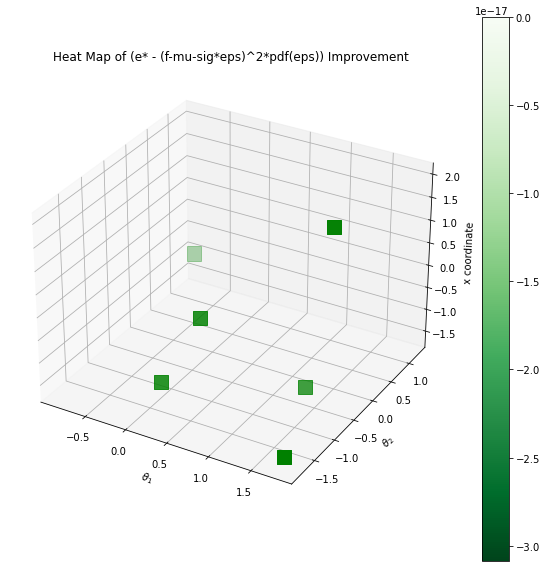

None


In [8]:
Integrand_values = improvement_integral(best_error,model_mean,model_variance,y_exp)
print("Lower Improvement Integrand is \n",Integrand_values[0] )
print("Upper Improvement Integrand is \n",Integrand_values[1] )
print(improvement_integral_plot(test_p,Integrand_values))

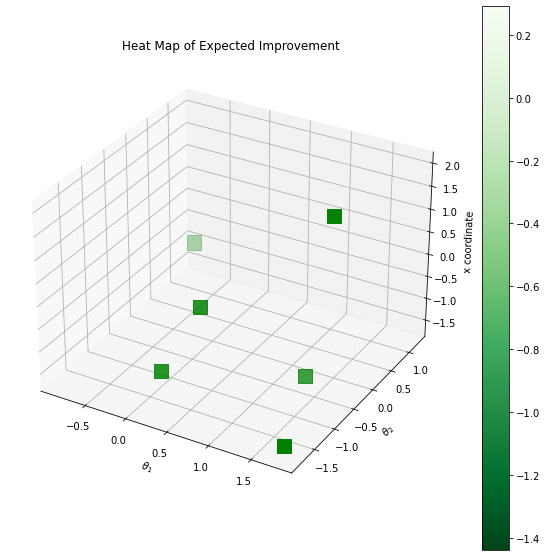

None


In [9]:
print(ei_plotter_adv(test_p, ei))

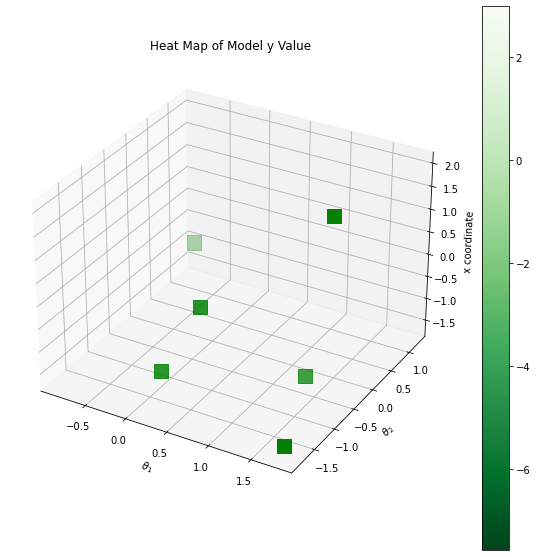

None


In [10]:

y_title = "Model y Value"
print(y_plotter_adv(test_p, model_y, y_title))

Index:  1


TypeError: tuple indices must be integers or slices, not str

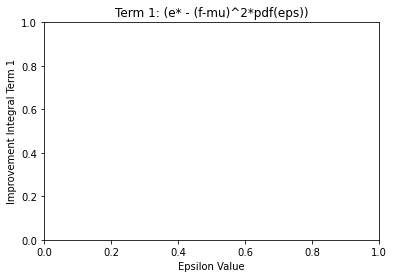

In [13]:
from matplotlib import pyplot as plt
import numpy as np
import torch

steps = 100
term_num = 1
index_num = 5

I_terms = improvement_int_terms(best_error,model_mean,model_variance,y_exp,steps)
epsilon_space = np.array(I_terms[0])
I_term_1 =  np.array(I_terms[1])
I_term_2 =  np.array(I_terms[2])
I_term_3 =  np.array(I_terms[3])
    

improvement_int_terms_plot(epsilon_space,I_terms,term_num, index_num)